# CLASS 3


# Notes: Linear Classifiers (Binary Problems)

Computational intelligence often deals with the task of classification, where the goal is to assign a class label to a given input. Linear classifiers are one of the fundamental building blocks for this task, especially in binary classification problems (two classes).

## Decision Function

The decision function for a linear classifier is the basis for how it assigns a class to a new data sample. It is defined as:

$F(x) = sgn(\langle x, w \rangle + b)$

Let's break down each component:

*   **$x$**: The feature vector of the input sample. If we have $d$ features, then $x = [x_1, x_2, ..., x_d]^T$.
*   **$w$**: The weight vector. Each weight $w_i$ is associated with a feature $x_i$. This vector determines the orientation of the decision hyperplane in the feature space. $w = [w_1, w_2, ..., w_d]^T$.
*   **$b$**: The bias term (or intercept). It allows the decision hyperplane to be shifted away from the origin, increasing the model's flexibility.
*   **$\langle x, w \rangle$**: The dot product between the input vector $x$ and the weight vector $w$. Mathematically, $\langle x, w \rangle = \sum_{i=1}^{d} x_i w_i$. Geometrically, this value is related to the projection of $x$ onto $w$.
*   **$g(x) = \langle x, w \rangle + b$**: This is the linear (or affine) function that computes a "score" for the input $x$. The value of $g(x)$ indicates the (signed) distance of the sample $x$ to the decision hyperplane.
    *   If $g(x) = 0$, the sample $x$ is exactly on the decision hyperplane.
    *   If $g(x) > 0$, the sample $x$ is on one side of the hyperplane.
    *   If $g(x) < 0$, the sample $x$ is on the other side of the hyperplane.
*   **$sgn(\cdot)$**: The sign function. It maps the score $g(x)$ to one of the two classes (usually represented by +1 and -1, or 1 and 0):
    *   $sgn(z) = +1$ if $z > 0$
    *   $sgn(z) = -1$ if $z < 0$
    *   $sgn(z) = 0$ if $z = 0$ (in practice, this can be assigned to one of the classes or left undefined).

The decision hyperplane is the set of points where $g(x) = \langle x, w \rangle + b = 0$. This hyperplane divides the feature space into two regions, each corresponding to a class.
## Linearly Separable Classes: Perceptron vs SVM

When classes are **linearly separable**, it means there exists at least one hyperplane that can perfectly separate all samples of one class from the samples of the other class.

### Perceptron

*   **Goal**: Find *any* hyperplane that separates the two classes.
*   **Algorithm**: The Perceptron algorithm is iterative. It starts with a random (or zero) weight vector $w$ and bias $b$. For each training sample, it checks if the classification is correct. If incorrect, the weights $w$ and bias $b$ are updated in the direction that corrects the error for that sample.
    *   Update rule (for classes $y \in \{-1, 1\}$ and learning rate $\eta$):
        If $y_i (\langle x_i, w \rangle + b) \le 0$ (misclassification):
        $w \leftarrow w + \eta y_i x_i$
        $b \leftarrow b + \eta y_i$
*   **Convergence**: If the data is linearly separable, the Perceptron algorithm is guaranteed to converge and find a separating hyperplane in a finite number of steps.
*   **Limitations**:
    *   If the data is not linearly separable, the Perceptron does not converge (it oscillates).
    *   It may find *any* separating hyperplane. Some of these hyperplanes may be very close to the samples of one class, leading to poor generalization for unseen test data.
    *   Sensitive to outliers if they are near the "ideal" decision boundary.

### Support Vector Machine (SVM)

*   **Goal**: Find the hyperplane that separates the two classes with the **maximum margin**.
*   **Margin**: The margin is the distance between the decision hyperplane and the closest samples from each class. The SVM seeks to maximize this "empty band" between the classes.
    *   The decision hyperplane is $\langle x, w \rangle + b = 0$.
    *   The margin hyperplanes are $\langle x, w \rangle + b = 1$ and $\langle x, w \rangle + b = -1$.
    *   The distance between these two margin hyperplanes is $2/||w||$. Maximizing the margin is equivalent to minimizing $||w||^2$ (or $1/2 ||w||^2$ for mathematical convenience).
*   **Convex Hull**:
    *   The *convex hull* of a set of points is the smallest convex polygon that contains all those points.
    *   The intuitive idea is that the maximum margin hyperplane is determined by the shortest distance between the convex hulls of the two classes. The points that define this shortest distance, and thus the margin, are called **support vectors**.
*   **Robustness to test data**: By maximizing the margin, the SVM tends to find a hyperplane that is more robust and generalizes better to unseen test data, as it is as far as possible from both classes.
*   **Outliers are still a problem**:
    *   In the **hard-margin** SVM, which assumes perfect linear separability, a single outlier can make the problem non-separable or drastically alter the optimal hyperplane, reducing the margin.
    *   To address this, there is the **soft-margin** SVM. It introduces slack variables ($\xi_i \ge 0$) that allow some samples to be misclassified or lie within the margin.
    *   The objective function of the soft-margin SVM becomes:
        Minimize $\frac{1}{2} ||w||^2 + C \sum_{i=1}^{N} \xi_i$
        Subject to $y_i (\langle x_i, w \rangle + b) \ge 1 - \xi_i$ and $\xi_i \ge 0$.
    *   The parameter $C > 0$ is a regularization parameter.
        *   Small $C$: Wider margin, tolerates more margin violations (more "soft").
        *   Large $C$: Narrower margin, strongly penalizes margin violations (closer to "hard").

#### Conceptual Comparison Chart (Perceptron vs SVM)

Imagine a set of 2D points (circles and squares).

In the (very simplified) plot above:
*   `H_svm` represents the hyperplane found by the SVM, positioned in the middle of the largest possible "street" between the circles and the crosses.
*   `H_perc` represents a possible hyperplane that the Perceptron could find. It separates the data, but is very close to the Cross class, which may lead to misclassification of new crosses that are slightly shifted.

The SVM, by maximizing the margin, chooses a "safer" separator.
Imagine a set of 2D points (circles and squares).

In the (very simplified) plot above:
*   `H_svm` represents the hyperplane found by the SVM, positioned in the middle of the largest possible "street" between the circles and the crosses.
*   `H_perc` represents a possible hyperplane that the Perceptron could find. It separates the data, but is very close to the Cross class, which may lead to misclassification of new crosses that are slightly shifted.

The SVM, by maximizing the margin, chooses a "safer" separator.

### KERNEL TRICK

Often, data is not linearly separable in the original feature space. The kernel trick is a powerful technique used mainly with SVMs (but applicable to other algorithms based on inner products) to handle non-linearly separable data.

*   **Central Idea**: Map the input data $x$ from the original space $\mathbb{R}^d$ to a higher-dimensional feature space $\mathcal{H}$ (potentially infinite-dimensional) using a mapping function $\phi: \mathbb{R}^d \rightarrow \mathcal{H}$. The hope is that, in this new space $\mathcal{H}$, the data becomes linearly separable.
*   **The "Trick"**: The SVM formulation (especially in its dual form) depends only on inner products between input vectors, $\langle x_i, x_j \rangle$. If we map the data to $\mathcal{H}$, we would need to compute $\langle \phi(x_i), \phi(x_j) \rangle$.
    The kernel trick consists of using a **kernel function** $K(x_i, x_j)$ that computes this inner product in the high-dimensional space $\mathcal{H}$ directly, without having to explicitly compute the coordinates $\phi(x_i)$ and $\phi(x_j)$.
    $K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle$
*   **Benefits**:
    1.  **Computational Efficiency**: Avoids explicit calculation and storage of the high-dimensional vectors $\phi(x)$.
    2.  **Handling Non-Linearity**: Allows linear classifiers (like SVM) to learn non-linear decision boundaries in the original space.
    3.  **Partially Avoids the Curse of Dimensionality**: By not needing to explicitly represent the vectors in $\mathcal{H}$, it avoids some of the computational costs associated with high dimensionality. However, the choice of kernel and its parameters is still crucial and can suffer from the curse of dimensionality in terms of sample requirements.

#### Common Types of Kernels:

1.  **Linear Kernel**: $K(x_i, x_j) = \langle x_i, x_j \rangle$.
    *   Equivalent to the standard SVM without explicit mapping. $\phi(x) = x$.
    *   Used when the data is already approximately linearly separable.

2.  **Polynomial Kernel**: $K(x_i, x_j) = (\gamma \langle x_i, x_j \rangle + r)^d$.
    *   $\gamma$: Scaling coefficient.
    *   $r$: Coefficient.
    *   $d$: Degree of the polynomial.
    *   Maps to a feature space of dimension $\binom{D+d}{d}$, where $D$ is the original dimension.
    *   Allows learning polynomial decision boundaries.

3.  **Gaussian Kernel (RBF - Radial Basis Function)**: $K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$.
    *   $\gamma$: Parameter that defines the "width" of the kernel's influence. If $\gamma$ is large, the influence is local; if small, the influence is broader. $||x_i - x_j||^2$ is the squared Euclidean distance.
    *   Maps to a feature space of infinite dimension.
    *   Very flexible, can create complex decision boundaries. It is a popular choice when there is no prior knowledge about the shape of the data.
    *   The parameter $\gamma$ is crucial:
        *   Very small $\gamma$: Very smooth boundary, may lead to underfitting.
        *   Very large $\gamma$: Very "wavy" boundary, may lead to overfitting, as each training point can have a very localized influence.

#### Learning Lagrange Multipliers and Support Vectors

The optimization of the SVM (both hard-margin and soft-margin) is generally solved using its **dual formulation**, which involves introducing **Lagrange multipliers** $\alpha_i \ge 0$, one for each training sample $(x_i, y_i)$.

The dual problem (for the separable case, simplified) is to maximize:
$L_D(\alpha) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(x_i, x_j)$
Subject to $\sum_{i=1}^{N} \alpha_i y_i = 0$ and $\alpha_i \ge 0$ for all $i$. (In the soft-margin case, there is an upper bound $0 \le \alpha_i \le C$).

*   **Support Vector**: After solving the optimization problem and finding the optimal $\alpha_i$:
    *   The training samples $x_i$ for which $\alpha_i > 0$ are called **support vectors**.
    *   These are the critical points that define the maximum margin hyperplane. They are either on the margin or, in the soft-margin case, may be within the margin or on the wrong side.
    *   If $\alpha_i = 0$, the sample $x_i$ is not a support vector and has no direct influence on the definition of the hyperplane. Removing or adding points with $\alpha_i=0$ does not change the solution (as long as they do not cross the margin).
    *   This property makes the SVM efficient in terms of memory and prediction, as only the support vectors are needed to define the classifier.

The weight vector $w$ can be expressed as a linear combination of the support vectors:
$w = \sum_{i \in SV} \alpha_i y_i x_i$ (or $\phi(x_i)$ if using a kernel)
And the bias $b$ can be calculated using any support vector $x_s$ that is exactly on the margin (for which $y_s(\langle w, x_s \rangle + b) = 1$).

#### Matrix ECOC

**Matrix ECOC (Error-Correcting Output Codes)** is a strategy for extending binary classifiers, such as SVMs, to handle multi-class classification problems.

- **Core Idea:** Instead of training a single multi-class classifier, ECOC decomposes a $K$-class problem into multiple binary classification tasks. Each class is assigned a unique binary codeword (a row in a code matrix), and each column of the matrix defines a binary classification problem (a "dichotomy") over the classes.
- **Code Matrix:** For $K$ classes and $L$ binary classifiers, the code matrix $M$ is of size $K \times L$. Each entry $M_{kl}$ is typically $+1$, $-1$, or $0$ (where $0$ means the class is not used in that dichotomy).
- **Training:** For each column (dichotomy), train a binary SVM to distinguish between the classes labeled $+1$ and $-1$.
- **Prediction:** To classify a new sample, run it through all $L$ binary classifiers to obtain a predicted codeword. Assign the sample to the class whose codeword in $M$ is closest (e.g., in Hamming distance) to the predicted codeword.

**Advantages:**
- **Error Correction:** If some binary classifiers make mistakes, the code structure can still allow correct classification, improving robustness.
- **Flexibility:** The design of the code matrix can control the trade-off between the number of classifiers and error-correcting capability.

**In SVM Context:**
- Each binary classifier in the ECOC framework can be implemented as an SVM, leveraging SVM's strong performance in binary tasks.
- ECOC with SVMs is a powerful and widely used approach for multi-class problems, especially when the number of classes is large or the classes are not easily separable.

**Summary Table:**

| Step         | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| Code Matrix  | Assign each class a unique binary codeword                                  |
| Training     | Train one SVM per column (dichotomy) of the matrix                          |
| Prediction   | Predict codeword for new sample, assign to class with closest codeword       |
| Benefit      | Robustness to errors, scalable to many classes                              |


#### Feature Space

The feature space ($\mathcal{H}$) is the vector space (usually of higher dimensionality) to which the input data is mapped by the function $\phi(x)$.
*   **Input Space**: Where your data $x$ originally resides.
*   **Feature Space**: Where the SVM finds a linear hyperplane. This linear hyperplane in $\mathcal{H}$ corresponds to a nonlinear boundary in the original input space.

### Curse of Dimensionality

This term, coined by Richard Bellman, refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings.

*   **Volume of Space**: The volume of the space grows exponentially with the number of dimensions. If you have a unit hypercube, in 1D it is a segment of length 1. In 2D, an area of 1. In 3D, a volume of 1. But if you consider an inscribed hypersphere, the ratio of the hypersphere's volume to the hypercube's volume tends to zero as the dimension increases. Almost all the volume of a high-dimensional hypercube is concentrated in its "corners."
*   **Data Sparsity**: To maintain the same sample density as dimensionality increases, the number of samples required grows exponentially. "The amount of samples needed increases geometrically after increasing the number of inputs." This means that, in high dimensions, the available data is usually sparse.
*   **Distances**: In high dimensions, the distance between the nearest and farthest point in a set of points tends to become indistinguishable (the contrast between distances decreases). This can make distance-based algorithms (like k-NN) less effective.
*   **Overfitting**: With many features (dimensions), models have more flexibility to fit the training data, including noise, leading to poor performance on unseen data.
*   **Relevance of the Kernel Trick**: The kernel trick helps to mitigate *some* aspects of the curse of dimensionality (such as the computational cost of explicitly working in high dimensions), but does not completely solve it. The choice of an appropriate kernel and regularization (such as the parameter $C$ in SVM) are crucial to avoid overfitting in high-dimensional feature spaces induced by the kernel.

### PAC (Probably Approximately Correct) Learning

PAC Learning is a theoretical framework in machine learning that tries to formally analyze if and when a learning algorithm can learn a concept.

*   **Goal**: A learning algorithm $L$ learns a class of concepts $C$ if, for any target concept $c \in C$, any probability distribution $D$ over the inputs, and any parameters $\epsilon$ (approximation error) and $\delta$ (failure probability):
    *   With probability at least $1 - \delta$ (the "Probably").
    *   The algorithm $L$, after seeing a sufficient number of training samples (polynomial in $1/\epsilon$, $1/\delta$, and the complexity of the concept), produces a hypothesis $h$ such that the true error of $h$ (the probability that $h(x) \neq c(x)$ for $x$ sampled from $D$) is at most $\epsilon$ (the "Approximately Correct").
    $P(error_D(h) \le \epsilon) \ge 1 - \delta$
*   **Key Concepts**:
    *   **Generalization Error ($\epsilon$)**: How well the learned hypothesis generalizes to unseen data.
    *   **Confidence ($\delta$)**: The probability that the algorithm *does not* produce a hypothesis with error $\epsilon$.
    *   **Sample Complexity**: The number of training examples needed to achieve the desired $\epsilon$ and $\delta$ levels.
    *   **VC Dimension (Vapnik-Chervonenkis Dimension)**: A measure of the "capacity" or "complexity" of a hypothesis class. For hyperplanes in $\mathbb{R}^d$, the VC dimension is $d+1$. Sample complexity in PAC learning is often bounded in terms of the VC dimension.
*   **Relevance to SVM**:
    *   PAC theory provides foundations for understanding why SVMs generalize well. Margin maximization is related to reducing the effective VC dimension, which leads to better generalization guarantees.
    *   PAC error bounds for SVMs depend inversely on the size of the margin. Larger margins imply smaller generalization error bounds.

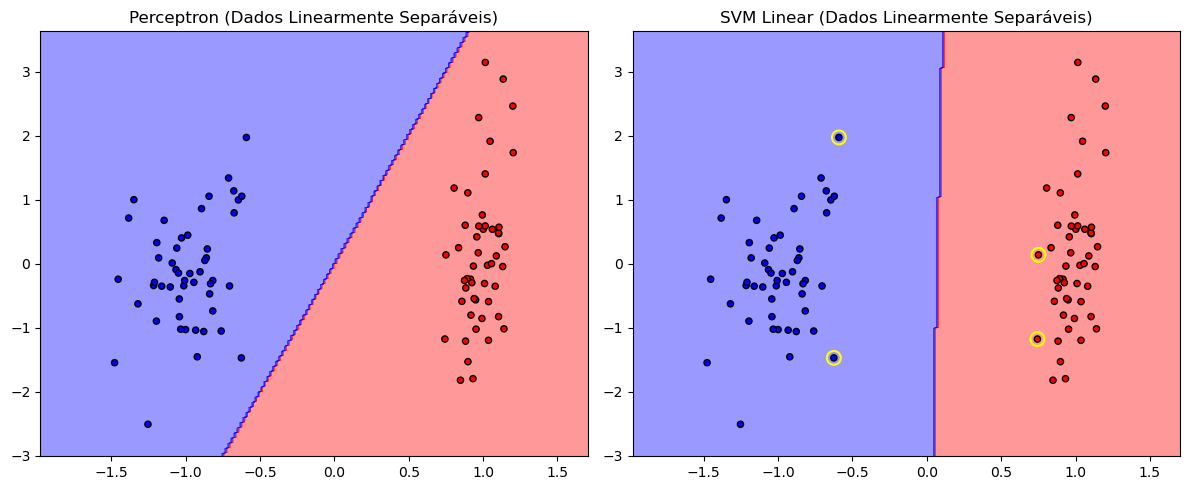

Acurácia Perceptron (Linear): 1.00
Acurácia SVM Linear (Linear): 1.00
Número de Vetores de Suporte (SVM Linear): 4


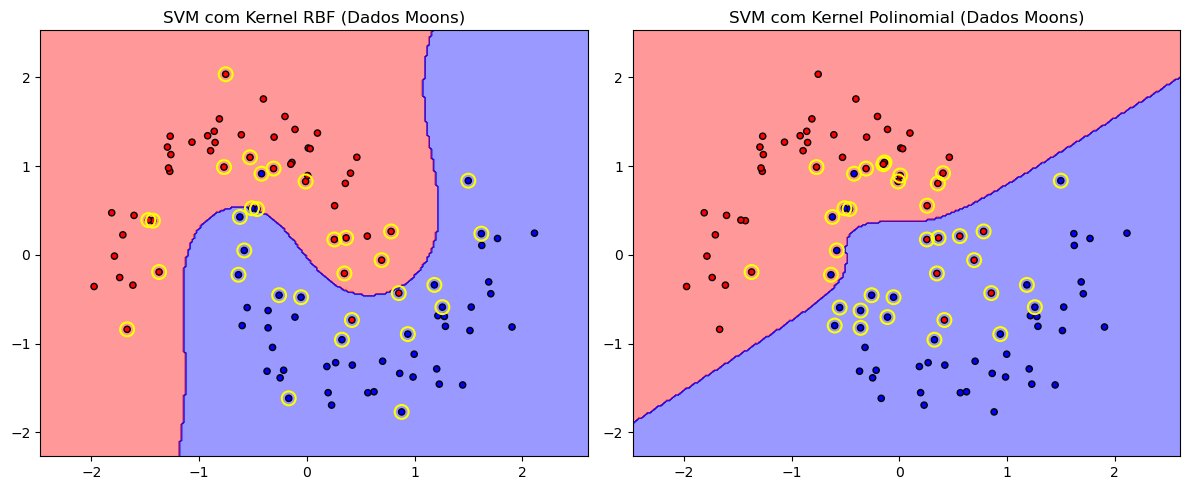

Acurácia SVM RBF (Moons): 0.95
Número de Vetores de Suporte (SVM RBF): 32
Acurácia SVM Polinomial (Moons): 0.86
Número de Vetores de Suporte (SVM Poly): 36


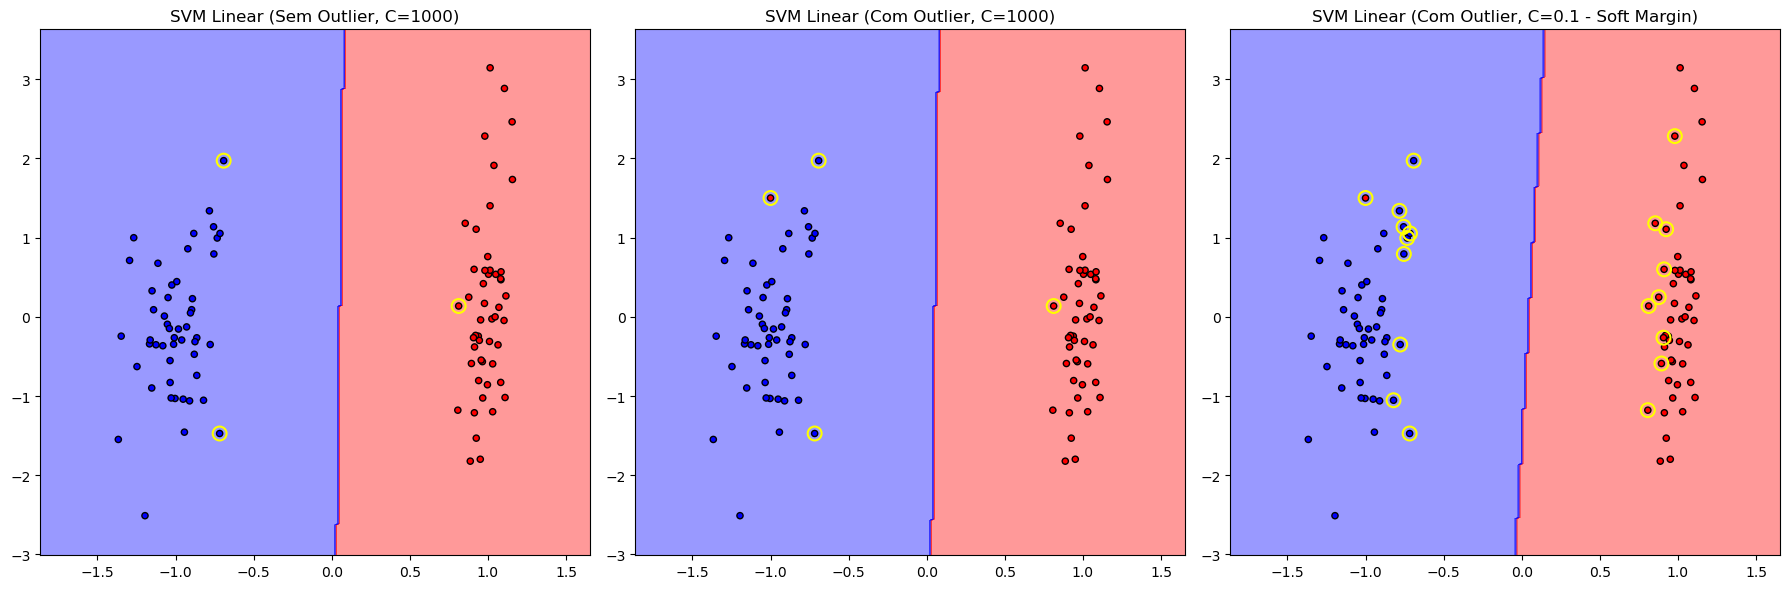

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Função auxiliar para plotar fronteiras de decisão
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plotar a fronteira de decisão
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
    
    # Plotar os pontos de treinamento
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    
    # Plotar vetores de suporte para SVM
    if hasattr(classifier, "support_vectors_"):
        sv = classifier.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='yellow', linewidths=1.5)

# 1. Dados Linearmente Separáveis
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                         n_informative=2, random_state=1,
                                         n_clusters_per_class=1, class_sep=1.5)
X_linear = StandardScaler().fit_transform(X_linear)

# Perceptron
perceptron_model = Perceptron(max_iter=100, tol=1e-3, random_state=42)
perceptron_model.fit(X_linear, y_linear)

# SVM Linear
svm_linear_model = SVC(kernel='linear', C=1.0, random_state=42) # C alto para margem mais rígida
svm_linear_model.fit(X_linear, y_linear)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_linear, y_linear, perceptron_model, "Perceptron (Dados Linearmente Separáveis)")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_linear, y_linear, svm_linear_model, "SVM Linear (Dados Linearmente Separáveis)")
plt.tight_layout()
plt.show()

print(f"Acurácia Perceptron (Linear): {perceptron_model.score(X_linear, y_linear):.2f}")
print(f"Acurácia SVM Linear (Linear): {svm_linear_model.score(X_linear, y_linear):.2f}")
if hasattr(svm_linear_model, "support_vectors_"):
    print(f"Número de Vetores de Suporte (SVM Linear): {len(svm_linear_model.support_vectors_)}")

# 2. Dados Não Linearmente Separáveis (Exemplo: Luas)
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)

# SVM com Kernel RBF
svm_rbf_model = SVC(kernel='rbf', gamma=0.7, C=1.0, random_state=42) # gamma e C são hiperparâmetros
svm_rbf_model.fit(X_moons, y_moons)

# SVM com Kernel Polinomial
svm_poly_model = SVC(kernel='poly', degree=3, gamma='auto', C=1.0, random_state=42)
svm_poly_model.fit(X_moons, y_moons)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_moons, y_moons, svm_rbf_model, "SVM com Kernel RBF (Dados Moons)")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_moons, y_moons, svm_poly_model, "SVM com Kernel Polinomial (Dados Moons)")
plt.tight_layout()
plt.show()

print(f"Acurácia SVM RBF (Moons): {svm_rbf_model.score(X_moons, y_moons):.2f}")
if hasattr(svm_rbf_model, "support_vectors_"):
    print(f"Número de Vetores de Suporte (SVM RBF): {len(svm_rbf_model.support_vectors_)}")
print(f"Acurácia SVM Polinomial (Moons): {svm_poly_model.score(X_moons, y_moons):.2f}")
if hasattr(svm_poly_model, "support_vectors_"):
    print(f"Número de Vetores de Suporte (SVM Poly): {len(svm_poly_model.support_vectors_)}")

# Exemplo para ilustrar o efeito de outliers no SVM Linear
X_outlier, y_outlier = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                           n_informative=2, random_state=1,
                                           n_clusters_per_class=1, class_sep=2.0)
X_outlier = StandardScaler().fit_transform(X_outlier)

# Adicionar um outlier
outlier_point = np.array([[-1, 1.5]]) # Ponto estrategicamente posicionado
outlier_label = np.array([0]) # Assumindo que 0 é uma das classes

X_with_outlier = np.vstack((X_outlier, outlier_point))
y_with_outlier = np.hstack((y_outlier, outlier_label))

# SVM Linear sem outlier
svm_no_outlier = SVC(kernel='linear', C=1000).fit(X_outlier, y_outlier) # C alto para tentar hard margin

# SVM Linear com outlier (C alto)
svm_with_outlier_hard = SVC(kernel='linear', C=1000).fit(X_with_outlier, y_with_outlier)

# SVM Linear com outlier (C baixo - soft margin)
svm_with_outlier_soft = SVC(kernel='linear', C=0.1).fit(X_with_outlier, y_with_outlier)


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plot_decision_boundary(X_outlier, y_outlier, svm_no_outlier, "SVM Linear (Sem Outlier, C=1000)")

plt.subplot(1, 3, 2)
plot_decision_boundary(X_with_outlier, y_with_outlier, svm_with_outlier_hard, "SVM Linear (Com Outlier, C=1000)")

plt.subplot(1, 3, 3)
plot_decision_boundary(X_with_outlier, y_with_outlier, svm_with_outlier_soft, "SVM Linear (Com Outlier, C=0.1 - Soft Margin)")

plt.tight_layout()
plt.show()

### Regularization

Regularization is a set of techniques used to prevent overfitting in machine learning models by discouraging overly complex solutions. The main idea is rooted in **Occam's Razor**: among competing hypotheses, the simplest one is preferred.

- **Purpose:**  
    - Makes the model more general and robust to unseen data.
    - Reduces the risk of overfitting, where the model fits noise or outliers in the training data, resulting in poor test performance.
    - Restricts the model's capacity to avoid learning spurious patterns.

- **How it works:**  
    - Adds a penalty term to the loss function, which increases with model complexity (e.g., the magnitude of the weights).
    - The regularization term is controlled by a hyperparameter (often called $\alpha$ or $C$).
        - **High $\alpha$ (or low $C$):** Stronger regularization, simpler model, possibly underfitting.
        - **Low $\alpha$ (or high $C$):** Weaker regularization, more complex model, risk of overfitting.

- **Common Regularization Terms:**  
    - **L2 Regularization (Ridge):** Adds $\lambda \sum w_i^2$ to the loss (penalizes large weights).
    - **L1 Regularization (Lasso):** Adds $\lambda \sum |w_i|$ to the loss (can drive some weights to zero, leading to sparse models).

- **In SVM:**  
    - The regularization parameter is $C$.
        - **Large $C$:** The model tries to classify all training examples correctly, allowing less margin violations (hard margin).
        - **Small $C$:** The model allows more margin violations, increasing the margin (soft margin), which can improve generalization.
    - The objective function for soft-margin SVM is:  
        $$ \min \frac{1}{2} ||w||^2 + C \sum_{i=1}^N \xi_i $$
        where $\xi_i$ are slack variables for margin violations.

- **Figure of Merit:**  
    - The loss function can be written as:  
        $$ \text{Loss} = \text{MSE} + \alpha \cdot \text{(model complexity)} $$
        where $\alpha$ is the regularization factor.

- **Effect on Support Vectors:**  
    - **Higher $C$:** More support vectors, tighter fit to the training data.
    - **Lower $C$:** Fewer support vectors, larger margin, better generalization.

- **SVM Linear vs Perceptron:**  
    - Both are linear classifiers, but SVM explicitly maximizes the margin and uses regularization to control complexity, while the Perceptron simply finds any separating hyperplane (if one exists) without considering margin or regularization.
    - There are useful visualizations and videos comparing the two approaches.

**Summary:**  
Regularization is essential for building models that generalize well to new data. By penalizing complexity, it helps avoid overfitting and improves the reliability of predictions, especially in high-dimensional spaces or when the training set is small. 